## Regresi Metode Linear
### Implementasi regresi untuk mencari hubungan durasi waktu belajar (TB) terhadap nilai ujian siswa (NT) - NIM terakhir % 4 == 0

#### Nama   : Femas Arianda Rizki
#### NIM    : 21120122130080
#### Kelas  : Metode Numerik - B

In [1]:
# kode sumber
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv("Student_Performance.csv")
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [13]:
data.shape

(10000, 6)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [26]:
data["Hours Studied"]

0       7
1       4
2       8
3       5
4       7
       ..
9995    1
9996    7
9997    6
9998    9
9999    7
Name: Hours Studied, Length: 10000, dtype: int64

In [27]:
data["Performance Index"]

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

### Visualisasi Data

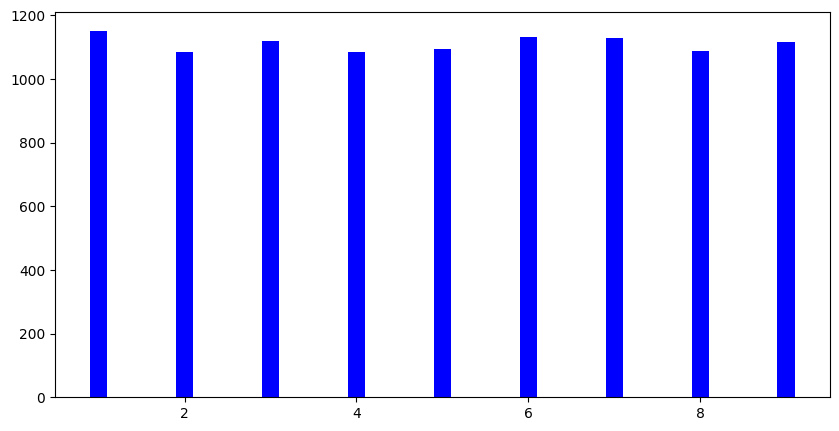

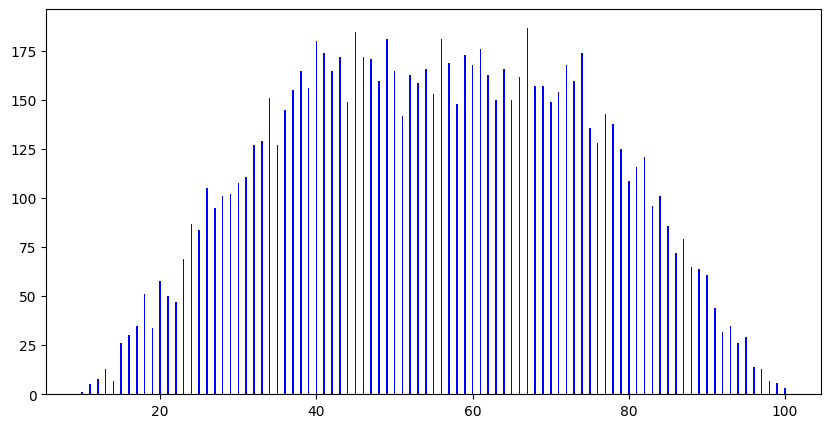

In [25]:
def barchart(column):
    count = data[column].value_counts()

    index = count.index
    values = count.values

    fig = plt.figure(figsize= (10, 5))
    plt.bar(index, values, color = "blue", width = 0.2)

barchart("Hours Studied")
barchart("Performance Index")

Persamaan garis lurusnya yaitu: y = 2.7731x + 41.3792
TB = 4.5
Untuk TB = 4.5, akan menghasilkan NT kira-kira sebesar 53.8580


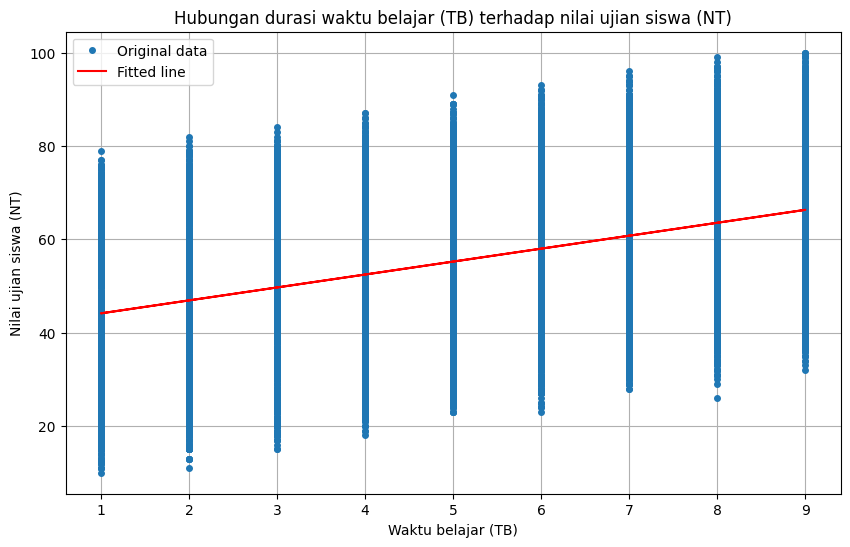

In [64]:
# mengekstrak kolom "Hours Studied" dan "Performance Index"
TB = data['Hours Studied'].values
NT = data['Performance Index'].values

# jumlah data poin (n)
n = len(TB)

# membangun matriks A dan vektor b untuk sistem persamaan linier Ax = b
# A adalah matriks (n x 2), di mana kolom pertama berisi data hours_studied dan kolom kedua berisi angka satu (untuk menambahkan intercept ke dalam model)
A = np.vstack([TB, np.ones(n)]).T
b = NT

# menyelesaikan persamaan Ax = b menggunakan metode kuadrat terkecil (least squares)
x = np.linalg.lstsq(A, b, rcond=None)[0]

# memisahkan nilai a dan b dari solusi x
a, b = x


# kode testing
print(f'Persamaan garis lurusnya yaitu: y = {a:.4f}x + {b:.4f}')
x = 4.5
print(f'TB = {x}')
print(f'Untuk TB = {x}, akan menghasilkan NT kira-kira sebesar {(a*x + b):.4f}')


# plot grafik data dan hasil regresi
plt.figure(figsize=(10, 6))
plt.plot(TB, NT, 'o', label='Original data', markersize=4)
plt.plot(TB, a*TB + b, 'r', label='Fitted line')
plt.xlabel('Waktu belajar (TB)')
plt.ylabel('Nilai ujian siswa (NT)')
plt.title('Hubungan durasi waktu belajar (TB) terhadap nilai ujian siswa (NT)')
plt.legend()
plt.grid(True)
plt.show()


### Galat RMS

In [68]:
predicted_NT = a * TB + b
residuals = NT - predicted_NT
squared_residuals = residuals ** 2
mean_squared_error = np.mean(squared_residuals)
rms = np.sqrt(mean_squared_error)

print(f'Galat pada regresi metode linear ini yaitu: {rms:.6f}')

Galat pada regresi metode linear ini yaitu: 17.819475
